In [1]:
!pip install -U keras-tuner
#library will allow us to perform the hypertuning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 9.7 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
from tensorflow import keras
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import keras_tuner as kt

Using TensorFlow backend


In [4]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000,28,28,1).astype('float32')/255.0 #6000 examples for trianing
x_test = x_test.reshape(10000,28,28,1).astype('float32')/255.0 #1000 for testing

#28*28 images


y_train = y_train.astype('int64')
y_test = y_test.astype('int64')


11490434/11490434 [==============================] - 0s 0us/step


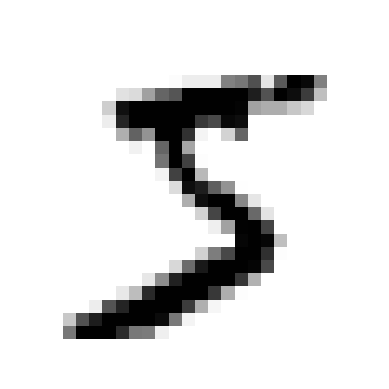

In [5]:
plt.imshow(x_train[0], cmap="binary") #i can changbe [0] to see
plt.axis('off')
plt.show()

In [6]:
y_train[0]

5

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8])

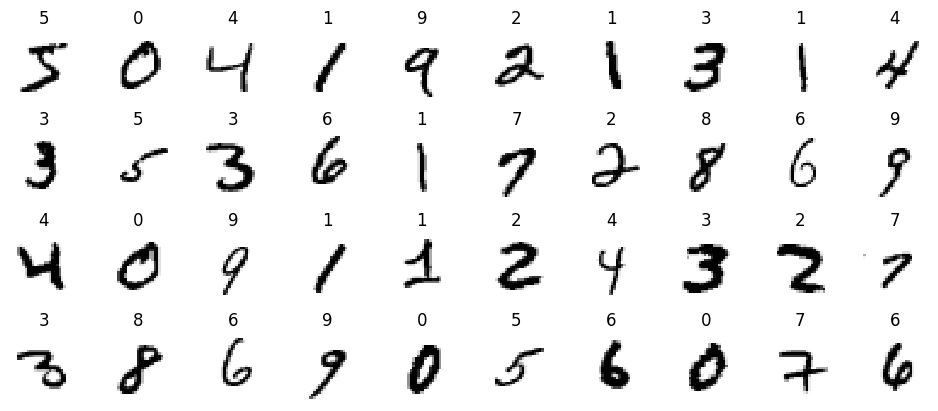

In [8]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Hyper parameters
##### Learning Rate
##### No.of dense nodes





In [9]:
def model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))

  model.add(keras.layers.Dense(units=hp.Int('units',
                                          min_value=32,
                                          max_value=512,
                                          step=128),
                                activation='relu')) #transform to an array of 784
  model.add(keras.layers.Dense(10, activation='softmax'))

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model



# Random Search

In [10]:
tuner = kt.RandomSearch(
    model,
    objective='val_accuracy',
    max_trials=2,
    executions_per_trial=1,
    directory='mydir',
    project_name='conchita_best_model')



In [11]:
tuner.search(x_train, y_train, epochs=5,validation_data=(x_test,y_test))

Trial 2 Complete [00h 01m 05s]
val_accuracy: 0.9606000185012817

Best val_accuracy So Far: 0.9606000185012817
Total elapsed time: 00h 02m 30s


### Best params and model

In [12]:
tuner.get_best_hyperparameters()[0].values

{'units': 288, 'learning_rate': 0.0001}

In [13]:
models = tuner.get_best_models()[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 288)               226080    
                                                                 
 dense_1 (Dense)             (None, 10)                2890      
                                                                 
Total params: 228,970
Trainable params: 228,970
Non-trainable params: 0
_________________________________________________________________


In [14]:
bayesian_tuner = kt.BayesianOptimization(
    model,
    objective='val_accuracy',
    max_trials=1,
    executions_per_trial=1,
    directory='mysecond_dir',
    project_name='conchita_best_model')

In [15]:
bayesian_tuner.search(x_train, y_train, epochs=5,validation_data=(x_test,y_test))

Trial 1 Complete [00h 01m 01s]
val_accuracy: 0.9606999754905701

Best val_accuracy So Far: 0.9606999754905701
Total elapsed time: 00h 01m 01s


In [16]:
bayesian_tuner.get_best_hyperparameters()[0].values

{'units': 288, 'learning_rate': 0.0001}

In [17]:
models = bayesian_tuner.get_best_models()[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 288)               226080    
                                                                 
 dense_1 (Dense)             (None, 10)                2890      
                                                                 
Total params: 228,970
Trainable params: 228,970
Non-trainable params: 0
_________________________________________________________________


In [18]:
bayesian_tuner.results_summary()

Results summary
Results in mysecond_dir/conchita_best_model
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
units: 288
learning_rate: 0.0001
Score: 0.9606999754905701


In [20]:
import joblib
joblib.dump(models, "Kt.pkl")

from google.colab import files

files.download("Kt.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>